In [7]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D


In [9]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(32, 32, 3), activation="relu"),
    BatchNormalization(),
    Conv2D(32, (3,3), padding='same', activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    Conv2D(64, (3,3), padding='same', activation="relu"),
    BatchNormalization(),
    Conv2D(64, (3,3), padding='same', activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.2),
    Conv2D(128, (3,3), padding='same', activation="relu"),
    BatchNormalization(),
    Conv2D(128, (3,3), padding='same', activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.4),
    Flatten(),
    Dense(10, activation='softmax')
])

print("created model")

model.compile(tf.keras.optimizers.RMSprop(lr=0.001,decay=1e-6), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=["accuracy"])

(x_train, raw_y_train), (x_test, raw_y_test) = tf.keras.datasets.cifar10.load_data()

raw_y_train = raw_y_train.flatten()
raw_y_test = raw_y_test.flatten()

y_train = np.zeros((raw_y_train.size, 10))
y_train[np.arange(raw_y_train.size), raw_y_train] = 1

y_test = np.zeros((raw_y_test.shape[0], 10))
y_test[np.arange(raw_y_test.size), raw_y_test] = 1

x_train = np.divide(x_train, 255)
x_test = np.divide(x_test, 255)


created model
170500096/170498071 [==============================] - 2s 0us/step


In [10]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), batch_size=64)

Epoch 1/50
782/782 [==============================] - 15s 9ms/step - loss: 2.2456 - accuracy: 0.3784 - val_loss: 1.6325 - val_accuracy: 0.5037
Epoch 2/50
782/782 [==============================] - 7s 9ms/step - loss: 1.2242 - accuracy: 0.6279 - val_loss: 1.5106 - val_accuracy: 0.5384
Epoch 3/50
782/782 [==============================] - 7s 9ms/step - loss: 0.9454 - accuracy: 0.7014 - val_loss: 0.8190 - val_accuracy: 0.7407
Epoch 4/50
782/782 [==============================] - 7s 9ms/step - loss: 0.7814 - accuracy: 0.7413 - val_loss: 0.9577 - val_accuracy: 0.6874
Epoch 5/50
782/782 [==============================] - 7s 9ms/step - loss: 0.6864 - accuracy: 0.7713 - val_loss: 0.8033 - val_accuracy: 0.7210
Epoch 6/50
782/782 [==============================] - 7s 9ms/step - loss: 0.6190 - accuracy: 0.7892 - val_loss: 0.8967 - val_accuracy: 0.7136
Epoch 7/50
782/782 [==============================] - 7s 9ms/step - loss: 0.5629 - accuracy: 0.8057 - val_loss: 0.9875 - val_accuracy: 0.6825
Epoch

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


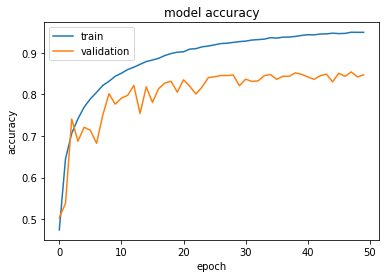

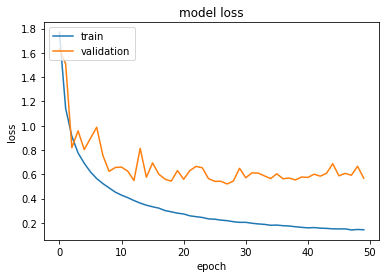

In [12]:
import matplotlib.pyplot as plt 

print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()